# Import Modules

In [94]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load Data

In [4]:
# Load Data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Split Data
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels,
                                                                                    stratify=train_labels,
                                                                                    test_size=0.2)
# Reshape Data
train_images = train_images.reshape((-1, 28, 28, 1))
validation_images = validation_images.reshape((-1, 28, 28, 1))
test_images=test_images.reshape((-1, 28, 28, 1))

11493376/11490434 [==============================] - 0s 0us/step


# Input Data Normalization

In [3]:
# Normalize Data
train_images, validation_images = train_images / 255.0, validation_images / 255.0

In [122]:
# mean subtraction and contrast normalization
train_images = train_images.astype(np.float32)
train_images -= train_images.mean()
# train_images /= train_images.std()

validation_images = validation_images.astype(np.float32)
validation_images -= validation_images.mean()
# validation_images /= validation_images.std()

# Basic Model

In [123]:
# Set Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_190 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_30 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 64)              

In [124]:
# Compile and Fit Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3471 - accuracy: 0.8899 - val_loss: 0.0709 - val_accuracy: 0.9789
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0441 - val_accuracy: 0.9865
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0539 - val_accuracy: 0.9850
Epoch 4/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0261 - accuracy: 0.9910 - val_loss: 0.0480 - val_accuracy: 0.9862
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0461 - val_accuracy: 0.9878
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 0.0378 - val_accuracy: 0.9893
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0522 - val_ac

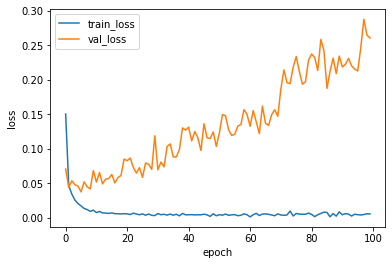

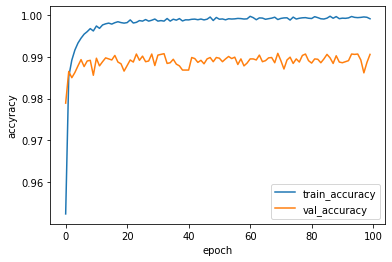

313/313 - 1s - loss: 21.8373 - accuracy: 0.9879


[21.837324142456055, 0.9879000186920166]

In [125]:
# Visualization
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accyracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

model.evaluate(test_images, test_labels, verbose=2)

# Xavier and He initializer

- Xavier initializer

In [26]:
# Set Model (Xavier)
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_normal', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='glorot_normal'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='glorot_normal'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu', kernel_initializer='glorot_normal'))
model2.add(layers.Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [27]:
# Compile and Fit Model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9466 - accuracy: 0.8659 - val_loss: 0.1098 - val_accuracy: 0.9690
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0787 - accuracy: 0.9764 - val_loss: 0.0759 - val_accuracy: 0.9775
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0591 - accuracy: 0.9826 - val_loss: 0.0850 - val_accuracy: 0.9753
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0512 - accuracy: 0.9850 - val_loss: 0.0547 - val_accuracy: 0.9837
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0438 - accuracy: 0.9871 - val_loss: 0.0834 - val_accuracy: 0.9797
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0380 - accuracy: 0.9888 - val_loss: 0.0544 - val_accuracy: 0.9859
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0311 - accuracy: 0.9918 - val_loss: 0.0604 - val_ac

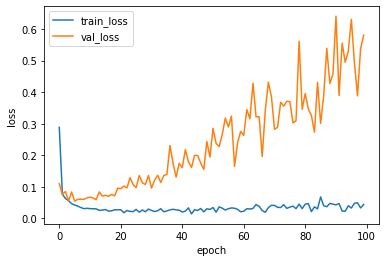

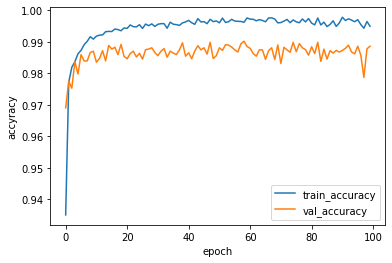

313/313 - 1s - loss: 0.3937 - accuracy: 0.9759


[0.3937256336212158, 0.9758999943733215]

In [28]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylabel('accyracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

model2.evaluate(test_images, test_labels, verbose=2)

- He initializer

In [11]:
# Set Model (He)
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu', kernel_initializer='he_normal'))
model3.add(layers.Dense(10, activation='softmax'))

model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [12]:
# Compile and Fit Model
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/100
1500/1500 [==============================] - 8s 3ms/step - loss: 9.5098 - accuracy: 0.7895 - val_loss: 0.3074 - val_accuracy: 0.9309
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2459 - accuracy: 0.9427 - val_loss: 0.1644 - val_accuracy: 0.9591
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1380 - accuracy: 0.9630 - val_loss: 0.1026 - val_accuracy: 0.9713
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1058 - accuracy: 0.9710 - val_loss: 0.1145 - val_accuracy: 0.9672
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0912 - accuracy: 0.9738 - val_loss: 0.1212 - val_accuracy: 0.9676
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0817 - accuracy: 0.9760 - val_loss: 0.1010 - val_accuracy: 0.9745
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0700 - accuracy: 0.9798 - val_loss: 0.0935 - val_ac

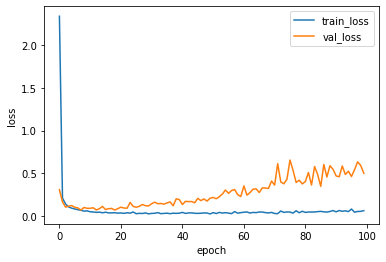

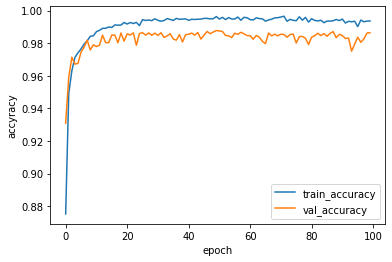

313/313 - 1s - loss: 0.4875 - accuracy: 0.9627


[0.487452894449234, 0.9627000093460083]

In [13]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylabel('accyracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

model3.evaluate(test_images, test_labels, verbose=2)

# Model Configuration

- first one

In [14]:
# Set Model (Config1)
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model4.add(layers.Conv2D(64, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal'))
model4.add(layers.Conv2D(256, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(128, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal'))
model4.add(layers.Conv2D(64, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu', kernel_initializer='he_normal'))
model4.add(layers.Dense(32, activation='relu', kernel_initializer='he_normal'))
model4.add(layers.Dense(10, activation='softmax'))

model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 128)        

In [15]:
# Compile and Fit Model
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/100
1500/1500 [==============================] - 11s 6ms/step - loss: 12.9697 - accuracy: 0.7560 - val_loss: 0.1840 - val_accuracy: 0.9518
Epoch 2/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1146 - accuracy: 0.9669 - val_loss: 0.0927 - val_accuracy: 0.9728
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0839 - accuracy: 0.9766 - val_loss: 0.0845 - val_accuracy: 0.9792
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0801 - accuracy: 0.9791 - val_loss: 0.0877 - val_accuracy: 0.9766
Epoch 5/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0860 - accuracy: 0.9776 - val_loss: 0.0543 - val_accuracy: 0.9857
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0746 - accuracy: 0.9804 - val_loss: 0.0701 - val_accuracy: 0.9829
Epoch 7/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0591 - accuracy: 0.9843 - val_loss: 0.0724 - v

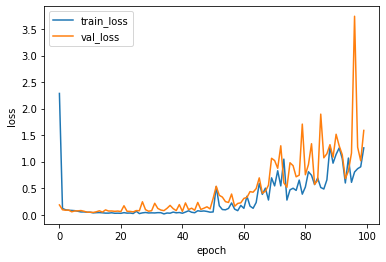

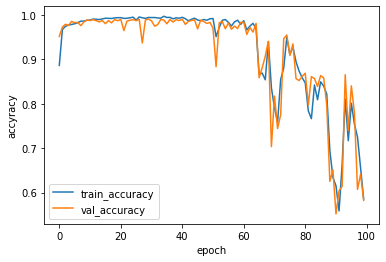

313/313 - 1s - loss: 1.6888 - accuracy: 0.5420


[1.6888035535812378, 0.5419999957084656]

In [16]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.ylabel('accyracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

model4.evaluate(test_images, test_labels, verbose=2)

- second one

In [6]:
# Set Model (Config2)
model5 = models.Sequential()
model5.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model5.add(layers.Conv2D(16, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal'))
model5.add(layers.Conv2D(32, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal'))
model5.add(layers.Conv2D(64, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Flatten())
model5.add(layers.Dense(32, activation='relu', kernel_initializer='he_normal'))
model5.add(layers.Dense(16, activation='relu', kernel_initializer='he_normal'))
model5.add(layers.Dense(10, activation='softmax'))

model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 16)        4624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 32)          9

In [7]:
# Compile and Fit Model
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history5 = model5.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/100
1500/1500 [==============================] - 38s 5ms/step - loss: 5.2633 - accuracy: 0.4101 - val_loss: 0.3809 - val_accuracy: 0.8997
Epoch 2/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3018 - accuracy: 0.9164 - val_loss: 0.1782 - val_accuracy: 0.9508
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1632 - accuracy: 0.9570 - val_loss: 0.1580 - val_accuracy: 0.9596
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1313 - accuracy: 0.9648 - val_loss: 0.1723 - val_accuracy: 0.9585
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1017 - accuracy: 0.9732 - val_loss: 0.0996 - val_accuracy: 0.9733
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0786 - accuracy: 0.9791 - val_loss: 0.0860 - val_accuracy: 0.9768
Epoch 7/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0761 - accuracy: 0.9791 - val_loss: 0.0947 - val_a

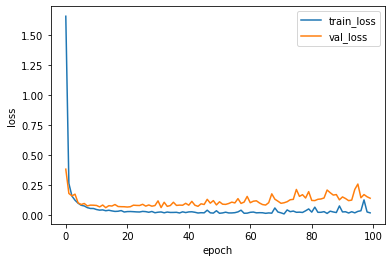

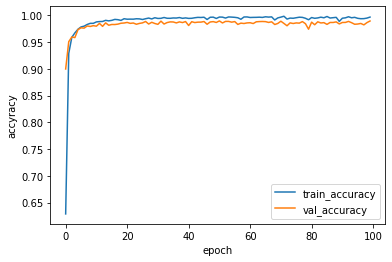

313/313 - 1s - loss: 0.0954 - accuracy: 0.9876


[0.09540499001741409, 0.9876000285148621]

In [8]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.ylabel('accyracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

model5.evaluate(test_images, test_labels, verbose=2)

# Other Optimization

- Adaelta

In [9]:
# Set Model (Adadelta)
model6 = models.Sequential()
model6.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model6.add(layers.Conv2D(16, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal'))
model6.add(layers.Conv2D(32, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal'))
model6.add(layers.Conv2D(64, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model6.add(layers.MaxPooling2D((2, 2)))
model6.add(layers.Flatten())
model6.add(layers.Dense(32, activation='relu', kernel_initializer='he_normal'))
model6.add(layers.Dense(16, activation='relu', kernel_initializer='he_normal'))
model6.add(layers.Dense(10, activation='softmax'))

model6.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 16)        2320      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 5, 5, 32)         

In [11]:
# Compile and Fit Model
model6.compile(optimizer='adadelta',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history6 = model6.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6001 - accuracy: 0.8414 - val_loss: 0.5866 - val_accuracy: 0.8447
Epoch 2/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5840 - accuracy: 0.8455 - val_loss: 0.5730 - val_accuracy: 0.8503
Epoch 3/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5559 - accuracy: 0.8545 - val_loss: 0.5652 - val_accuracy: 0.8547
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5434 - accuracy: 0.8588 - val_loss: 0.5590 - val_accuracy: 0.8566
Epoch 5/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5485 - accuracy: 0.8579 - val_loss: 0.5548 - val_accuracy: 0.8602
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5533 - accuracy: 0.8575 - val_loss: 0.5517 - val_accuracy: 0.8628
Epoch 7/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5378 - accuracy: 0.8614 - val_loss: 0.5488 - val_ac

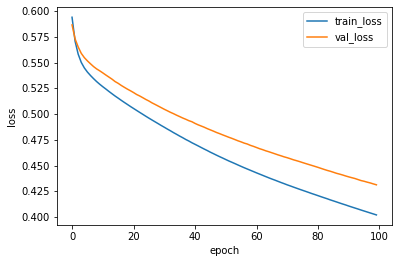

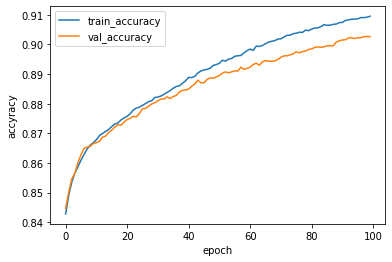

313/313 - 1s - loss: 0.4758 - accuracy: 0.9002


[0.47578373551368713, 0.9002000093460083]

In [12]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.ylabel('accyracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

model6.evaluate(test_images, test_labels, verbose=2)

- Nadam

In [15]:
# Set Model (Nadam)
model7 = models.Sequential()
model7.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model7.add(layers.Conv2D(16, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal'))
model7.add(layers.Conv2D(32, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal'))
model7.add(layers.Conv2D(64, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Flatten())
model7.add(layers.Dense(32, activation='relu', kernel_initializer='he_normal'))
model7.add(layers.Dense(16, activation='relu', kernel_initializer='he_normal'))
model7.add(layers.Dense(10, activation='softmax'))

model7.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 16)        4624      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 16)        2320      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 5, 32)         

In [16]:
# Compile and Fit Model
model7.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history7 = model7.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/100
1500/1500 [==============================] - 10s 6ms/step - loss: 9.5312 - accuracy: 0.2095 - val_loss: 1.7318 - val_accuracy: 0.3088
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.5543 - accuracy: 0.4105 - val_loss: 1.1840 - val_accuracy: 0.5736
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9630 - accuracy: 0.6510 - val_loss: 0.4616 - val_accuracy: 0.8821
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3288 - accuracy: 0.9209 - val_loss: 0.2244 - val_accuracy: 0.9431
Epoch 5/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1623 - accuracy: 0.9608 - val_loss: 0.1064 - val_accuracy: 0.9715
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0987 - accuracy: 0.9751 - val_loss: 0.1073 - val_accuracy: 0.9759
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0720 - accuracy: 0.9798 - val_loss: 0.0804 - val_a

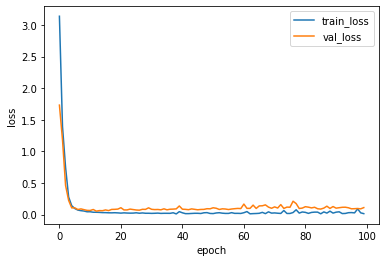

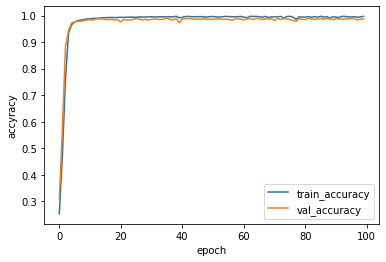

313/313 - 1s - loss: 0.1033 - accuracy: 0.9885


[0.10332707315683365, 0.9884999990463257]

In [17]:
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.ylabel('accyracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

model7.evaluate(test_images, test_labels, verbose=2)

# Different Activation functions

- SeLU

In [53]:
# Set Model (SeLU)

model8 = models.Sequential()
model8.add(layers.Conv2D(32, (3, 3),padding='same', activation='selu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model8.add(layers.Conv2D(16, (3, 3),padding='valid', activation='selu', kernel_initializer='he_normal'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(16, (3, 3),padding='same', activation='selu', kernel_initializer='he_normal'))
model8.add(layers.Conv2D(32, (3, 3),padding='valid', activation='selu', kernel_initializer='he_normal'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Conv2D(32, (3, 3),padding='same', activation='selu', kernel_initializer='he_normal'))
model8.add(layers.Conv2D(64, (3, 3),padding='valid', activation='selu', kernel_initializer='he_normal'))
model8.add(layers.MaxPooling2D((2, 2)))
model8.add(layers.Flatten())
model8.add(layers.Dense(32, activation='selu', kernel_initializer='he_normal'))
model8.add(layers.Dense(16, activation='selu', kernel_initializer='he_normal'))
model8.add(layers.Dense(10, activation='softmax'))

model8.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 26, 26, 16)        4624      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 13, 13, 16)        2320      
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 5, 5, 32)        

In [54]:
# Compile and Fit Model
model8.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history8 = model8.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/100
1500/1500 [==============================] - 11s 6ms/step - loss: 9.7311 - accuracy: 0.1768 - val_loss: 1.5121 - val_accuracy: 0.4299
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.4965 - accuracy: 0.4251 - val_loss: 0.9516 - val_accuracy: 0.6234
Epoch 3/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.8993 - accuracy: 0.6344 - val_loss: 0.8171 - val_accuracy: 0.6812
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6197 - accuracy: 0.7780 - val_loss: 0.4004 - val_accuracy: 0.9209
Epoch 5/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2426 - accuracy: 0.9392 - val_loss: 0.2341 - val_accuracy: 0.9477
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1591 - accuracy: 0.9594 - val_loss: 0.1469 - val_accuracy: 0.9689
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1265 - accuracy: 0.9677 - val_loss: 0.1571 - val_

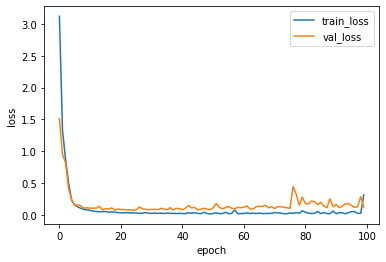

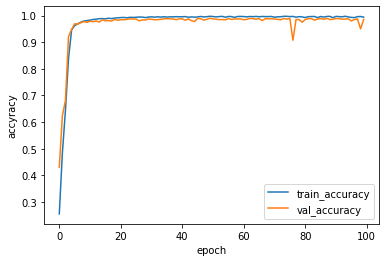

313/313 - 1s - loss: 147968.8125 - accuracy: 0.1585


[147968.8125, 0.15850000083446503]

In [55]:
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.ylabel('accyracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

model8.evaluate(test_images, test_labels, verbose=2)

- Leaky ReLU

In [41]:
# Set Model (Leaky ReLU)
leaky_relu = tf.nn.leaky_relu

model9 = models.Sequential()
model9.add(layers.Conv2D(32, (3, 3),padding='same', activation=leaky_relu, kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model9.add(layers.Conv2D(16, (3, 3),padding='valid', activation=leaky_relu, kernel_initializer='he_normal'))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(16, (3, 3),padding='same', activation=leaky_relu, kernel_initializer='he_normal'))
model9.add(layers.Conv2D(32, (3, 3),padding='valid', activation=leaky_relu, kernel_initializer='he_normal'))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Conv2D(32, (3, 3),padding='same', activation=leaky_relu, kernel_initializer='he_normal'))
model9.add(layers.Conv2D(64, (3, 3),padding='valid', activation=leaky_relu, kernel_initializer='he_normal'))
model9.add(layers.MaxPooling2D((2, 2)))
model9.add(layers.Flatten())
model9.add(layers.Dense(32, activation=leaky_relu, kernel_initializer='he_normal'))
model9.add(layers.Dense(16, activation=leaky_relu, kernel_initializer='he_normal'))
model9.add(layers.Dense(10, activation='softmax'))

model9.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 26, 26, 16)        4624      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 13, 13, 16)        2320      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 5, 5, 32)        

In [42]:
# Compile and Fit Model
model9.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history9 = model9.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/100
1500/1500 [==============================] - 11s 7ms/step - loss: 7.3728 - accuracy: 0.6652 - val_loss: 0.2303 - val_accuracy: 0.9402
Epoch 2/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1904 - accuracy: 0.9454 - val_loss: 0.1748 - val_accuracy: 0.9542
Epoch 3/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1195 - accuracy: 0.9654 - val_loss: 0.1380 - val_accuracy: 0.9588
Epoch 4/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0950 - accuracy: 0.9710 - val_loss: 0.0979 - val_accuracy: 0.9759
Epoch 5/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0833 - accuracy: 0.9756 - val_loss: 0.0959 - val_accuracy: 0.9753
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0737 - accuracy: 0.9781 - val_loss: 0.0800 - val_accuracy: 0.9787
Epoch 7/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0626 - accuracy: 0.9819 - val_loss: 0.1073 - v

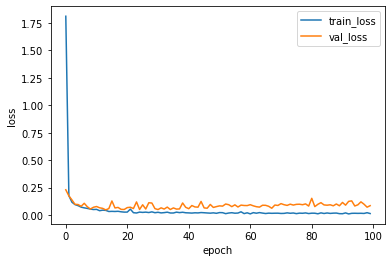

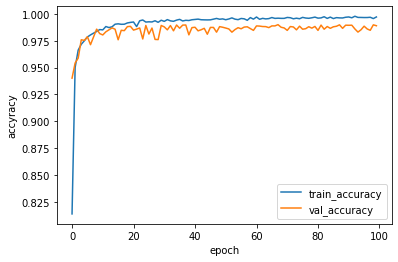

313/313 - 1s - loss: 0.0966 - accuracy: 0.9870


[0.0965845137834549, 0.9869999885559082]

In [43]:
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.ylabel('accyracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

model9.evaluate(test_images, test_labels, verbose=2)

# Regularization

- L1

In [64]:
# Set Model (L1)
model10 = models.Sequential()
model10.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1(0.0001), input_shape=(28, 28, 1)))
model10.add(layers.Conv2D(16, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1(0.0001)))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1(0.0001)))
model10.add(layers.Conv2D(32, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1(0.0001)))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1(0.0001)))
model10.add(layers.Conv2D(64, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1(0.0001)))
model10.add(layers.MaxPooling2D((2, 2)))
model10.add(layers.Flatten())
model10.add(layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1(0.0001)))
model10.add(layers.Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1(0.0001)))
model10.add(layers.Dense(10, activation='softmax'))

model10.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 26, 26, 16)        4624      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 13, 13, 16)        2320      
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 5, 5, 32)        

In [65]:
# Compile and Fit Model
model10.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history10 = model10.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/100
1500/1500 [==============================] - 11s 6ms/step - loss: 7.8930 - accuracy: 0.3543 - val_loss: 1.2702 - val_accuracy: 0.6580
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.1067 - accuracy: 0.7302 - val_loss: 0.7371 - val_accuracy: 0.8845
Epoch 3/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.6337 - accuracy: 0.9146 - val_loss: 0.4548 - val_accuracy: 0.9576
Epoch 4/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4184 - accuracy: 0.9632 - val_loss: 0.3896 - val_accuracy: 0.9688
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3531 - accuracy: 0.9740 - val_loss: 0.3467 - val_accuracy: 0.9735
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3056 - accuracy: 0.9796 - val_loss: 0.3168 - val_accuracy: 0.9732
Epoch 7/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2718 - accuracy: 0.9817 - val_loss: 0.2661 - v

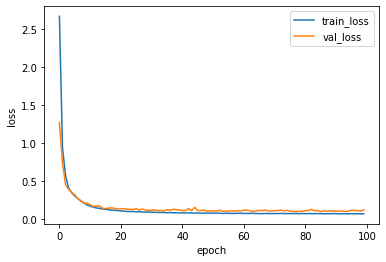

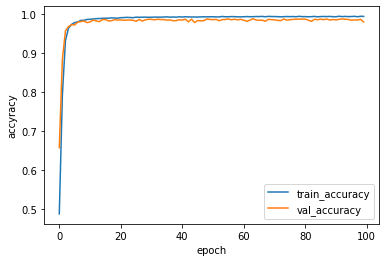

313/313 - 1s - loss: 0.1058 - accuracy: 0.9841


[0.10581807792186737, 0.9840999841690063]

In [66]:
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.ylabel('accyracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

model10.evaluate(test_images, test_labels, verbose=2)

- L2 

In [75]:
# Set Model (L2)
model11 = models.Sequential()
model11.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001), input_shape=(28, 28, 1)))
model11.add(layers.Conv2D(16, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001)))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001)))
model11.add(layers.Conv2D(32, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001)))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001)))
model11.add(layers.Conv2D(64, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001)))
model11.add(layers.MaxPooling2D((2, 2)))
model11.add(layers.Flatten())
model11.add(layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.001)))
model11.add(layers.Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001)))
model11.add(layers.Dense(10, activation='softmax'))

model11.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 26, 26, 16)        4624      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 13, 13, 16)        2320      
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 5, 5, 32)        

In [76]:
# Compile and Fit Model
model11.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history11 = model11.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/100
1500/1500 [==============================] - 11s 6ms/step - loss: 8.0719 - accuracy: 0.1442 - val_loss: 2.1724 - val_accuracy: 0.1985
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 2.1183 - accuracy: 0.2201 - val_loss: 1.2179 - val_accuracy: 0.6291
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0577 - accuracy: 0.6665 - val_loss: 0.5504 - val_accuracy: 0.8938
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3984 - accuracy: 0.9324 - val_loss: 0.2163 - val_accuracy: 0.9649
Epoch 5/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1914 - accuracy: 0.9675 - val_loss: 0.1517 - val_accuracy: 0.9774
Epoch 6/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1401 - accuracy: 0.9794 - val_loss: 0.1568 - val_accuracy: 0.9724
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1224 - accuracy: 0.9816 - val_loss: 0.1201 - val

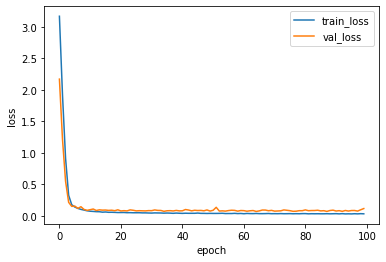

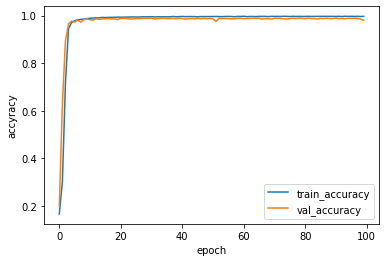

313/313 - 1s - loss: 0.0900 - accuracy: 0.9833


[0.09003309905529022, 0.983299970626831]

In [77]:
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.ylabel('accyracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

model11.evaluate(test_images, test_labels, verbose=2)

- L1 + L2

In [72]:
# Set Model (L1_L2)
model12 = models.Sequential()
model12.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1_l2(0.0001, 0.0001), input_shape=(28, 28, 1)))
model12.add(layers.Conv2D(16, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1_l2(0.0001, 0.0001)))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1_l2(0.0001, 0.0001)))
model12.add(layers.Conv2D(32, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1_l2(0.0001, 0.0001)))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1_l2(0.0001, 0.0001)))
model12.add(layers.Conv2D(64, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1_l2(0.0001, 0.0001)))
model12.add(layers.MaxPooling2D((2, 2)))
model12.add(layers.Flatten())
model12.add(layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1_l2(0.0001, 0.0001)))
model12.add(layers.Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1_l2(0.0001, 0.0001)))
model12.add(layers.Dense(10, activation='softmax'))

model12.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 26, 26, 16)        4624      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 13, 13, 16)        2320      
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 5, 5, 32)        

In [73]:
# Compile and Fit Model
model12.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history12 = model12.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/100
1500/1500 [==============================] - 12s 7ms/step - loss: 6.4702 - accuracy: 0.4335 - val_loss: 0.7674 - val_accuracy: 0.8755
Epoch 2/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6699 - accuracy: 0.9079 - val_loss: 0.5320 - val_accuracy: 0.9467
Epoch 3/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4847 - accuracy: 0.9550 - val_loss: 0.4480 - val_accuracy: 0.9593
Epoch 4/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4106 - accuracy: 0.9685 - val_loss: 0.3923 - val_accuracy: 0.9695
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3514 - accuracy: 0.9761 - val_loss: 0.3239 - val_accuracy: 0.9776
Epoch 6/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3053 - accuracy: 0.9790 - val_loss: 0.3281 - val_accuracy: 0.9674
Epoch 7/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2608 - accuracy: 0.9824 - val_loss: 0.2527 -

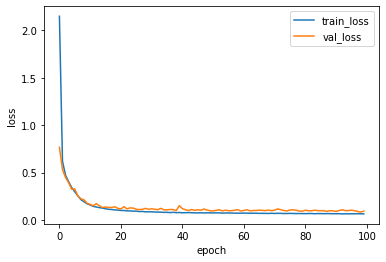

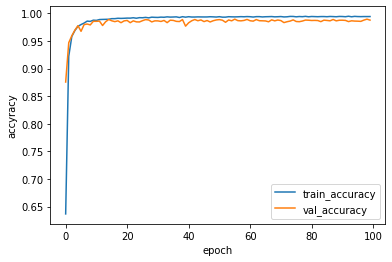

313/313 - 1s - loss: 0.0851 - accuracy: 0.9885


[0.08513908088207245, 0.9884999990463257]

In [74]:
plt.plot(history12.history['loss'])
plt.plot(history12.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history12.history['accuracy'])
plt.plot(history12.history['val_accuracy'])
plt.ylabel('accyracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

model12.evaluate(test_images, test_labels, verbose=2)

- Drop out

In [87]:
# Set Model (Drop out)
model13 = models.Sequential()
model13.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model13.add(layers.Conv2D(16, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model13.add(layers.MaxPooling2D((2, 2)))
model13.add(layers.Conv2D(16, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal'))
model13.add(layers.Conv2D(32, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model13.add(layers.MaxPooling2D((2, 2)))
model13.add(layers.Conv2D(32, (3, 3),padding='same', activation='relu', kernel_initializer='he_normal'))
model13.add(layers.Conv2D(64, (3, 3),padding='valid', activation='relu', kernel_initializer='he_normal'))
model13.add(layers.MaxPooling2D((2, 2)))
model13.add(layers.Flatten())
model13.add(Dropout(0.5))
model13.add(layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1(0.0001)))
model13.add(layers.Dense(16, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1(0.0001)))
model13.add(layers.Dense(10, activation='softmax'))

model13.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 26, 26, 16)        4624      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 13, 13, 16)        2320      
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 5, 5, 32)        

In [88]:
# Compile and Fit Model
model13.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history13 = model13.fit(train_images, train_labels, epochs=100, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/100
1500/1500 [==============================] - 11s 6ms/step - loss: 10.0012 - accuracy: 0.1885 - val_loss: 1.4192 - val_accuracy: 0.5926
Epoch 2/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.6295 - accuracy: 0.4181 - val_loss: 0.7316 - val_accuracy: 0.8344
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.3110 - accuracy: 0.5148 - val_loss: 0.5349 - val_accuracy: 0.8948
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0047 - accuracy: 0.6588 - val_loss: 0.3333 - val_accuracy: 0.9301
Epoch 5/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7942 - accuracy: 0.7363 - val_loss: 0.3047 - val_accuracy: 0.9261
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6024 - accuracy: 0.8090 - val_loss: 0.2621 - val_accuracy: 0.9463
Epoch 7/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4887 - accuracy: 0.8484 - val_loss: 0.1917 - val

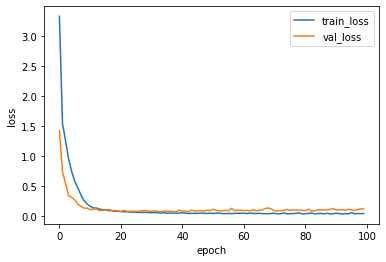

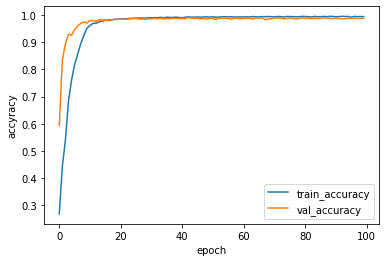

313/313 - 1s - loss: 0.9720 - accuracy: 0.8310


[0.9719507098197937, 0.8309999704360962]

In [89]:
plt.plot(history13.history['loss'])
plt.plot(history13.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(history13.history['accuracy'])
plt.plot(history13.history['val_accuracy'])
plt.ylabel('accyracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

model13.evaluate(test_images, test_labels, verbose=2)